<a href="https://colab.research.google.com/github/LuluTamaturgo/Challenger_Machine_Learning_TelecomX/blob/main/Machine_Learning_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o arquivo tratado no Chalenger anterior

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Formação Data Science/Challenger: Desafios/df_tratado.csv')
dados.head()

,ID_num,ID_text,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,2,orfbo,no,female,0,yes,yes,9,yes,no,...,no,yes,yes,no,one year,yes,mailed check,65,593.30,2.17
1,3,mknfe,no,male,0,no,no,9,yes,yes,...,no,no,no,yes,month-to-month,no,mailed check,59,542.40,1.97
2,4,tlhlj,yes,male,0,no,no,4,yes,no,...,yes,no,no,no,month-to-month,yes,electronic check,73,280.85,2.43
3,11,igkff,yes,male,1,yes,no,13,yes,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98,1237.85,3.27
4,13,exchz,yes,female,1,yes,no,3,yes,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83,267.40,2.77


# Criando uma cópia para utilizar no modelo:

Nesta cópia deixarei somente as colunas uteis para o treinamento do modelo

In [ ]:
copia_dados = dados.copy()
copia_dados.head()

,ID_num,ID_text,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,2,orfbo,no,female,0,yes,yes,9,yes,no,...,no,yes,yes,no,one year,yes,mailed check,65,593.30,2.17
1,3,mknfe,no,male,0,no,no,9,yes,yes,...,no,no,no,yes,month-to-month,no,mailed check,59,542.40,1.97
2,4,tlhlj,yes,male,0,no,no,4,yes,no,...,yes,no,no,no,month-to-month,yes,electronic check,73,280.85,2.43
3,11,igkff,yes,male,1,yes,no,13,yes,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98,1237.85,3.27
4,13,exchz,yes,female,1,yes,no,3,yes,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83,267.40,2.77


In [ ]:
copia_dados.columns

Index(['ID_num', 'ID_text', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total',
       'Contas_Diarias'],
      dtype='object')

# Excluindo as colunas desnecessarias:

In [ ]:
colunas_remover = ['ID_num','ID_text']
copia_dados.drop(columns=colunas_remover, inplace=True)


In [ ]:
copia_dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65,593.30,2.17
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59,542.40,1.97
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73,280.85,2.43
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98,1237.85,3.27
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83,267.40,2.77


In [ ]:
#Salvando a altereção em um novo DataFrame:

copia_dados.to_csv('df_tratado.csv', index=False)

# Identificando as variáveis que serão transformadas em one-hot encoding

In [ ]:
colunas_categoricas = copia_dados.select_dtypes(include='object').columns
print(colunas_categoricas)

Index(['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
# realizando a codificação:

copia_dados_encoded = pd.get_dummies(copia_dados, columns=colunas_categoricas, drop_first=True)
copia_dados_encoded.head()

,SeniorCitizen,tenure,Monthly,Total,Contas_Diarias,Churn_yes,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,...,DeviceProtection_yes,TechSupport_yes,StreamingTV_yes,StreamingMovies_yes,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,9,65,593.30,2.17,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59,542.40,1.97,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73,280.85,2.43,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98,1237.85,3.27,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83,267.40,2.77,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [ ]:
# Converte todos os valores booleanos em inteiros (True → 1, False → 0)
copia_dados_encoded = copia_dados_encoded.astype(int)
copia_dados_encoded

,SeniorCitizen,tenure,Monthly,Total,Contas_Diarias,Churn_yes,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,...,DeviceProtection_yes,TechSupport_yes,StreamingTV_yes,StreamingMovies_yes,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,9,65,593,2,0,0,1,1,1,...,0,1,1,0,1,0,1,0,0,1
1,0,9,59,542,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,4,73,280,2,1,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,1,13,98,1237,3,1,1,1,0,1,...,1,0,1,1,0,0,1,0,1,0
4,1,3,83,267,2,1,0,1,0,1,...,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,13,55,742,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
7022,0,22,85,1873,2,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7023,0,2,50,92,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7024,0,67,67,4627,2,0,1,1,1,1,...,1,1,0,1,0,1,0,0,0,1


In [ ]:
copia_dados_encoded.to_csv("copia_dados_encoded.csv", index=False)

In [ ]:
#  Separar variáveis independentes (X) e o alvo (y)

X = copia_dados_encoded.drop(columns='Churn_yes')
y = copia_dados_encoded['Churn_yes']



In [ ]:
# Dividir os dados em treino e teste

from sklearn.model_selection import train_test_split

# Separar em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Treinar os modelos

### Modelo 1: Regressão Logística

In [ ]:
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Modelo 2: Random Forest

In [ ]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Avaliar os modelos

In [ ]:
# Função para imprimir as métricas:

def avaliar_modelo(modelo, X_test, y_test, nome):
    y_pred = modelo.predict(X_test)
    print(f"\n🔍 Avaliação do modelo: {nome}")
    print("Acurácia: ", accuracy_score(y_test, y_pred))
    print("Precisão: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1-score: ", f1_score(y_test, y_pred))
    print("\nRelatório completo:\n", classification_report(y_test, y_pred))

avaliar_modelo(modelo_lr, X_test, y_test, "Regressão Logística")
avaliar_modelo(modelo_rf, X_test, y_test, "Random Forest")




🔍 Avaliação do modelo: Regressão Logística
Acurácia:  0.8059772296015181
Precisão:  0.6346153846153846
Recall:  0.6010928961748634
F1-score:  0.617399438727783

Relatório completo:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1559
           1       0.63      0.60      0.62       549

    accuracy                           0.81      2108
   macro avg       0.75      0.74      0.74      2108
weighted avg       0.80      0.81      0.80      2108


🔍 Avaliação do modelo: Random Forest
Acurácia:  0.793168880455408
Precisão:  0.6292906178489702
Recall:  0.5009107468123861
F1-score:  0.5578093306288032

Relatório completo:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1559
           1       0.63      0.50      0.56       549

    accuracy                           0.79      2108
   macro avg       0.73      0.70      0.71      2108
weighted avg       0.78      0.79      0.

#  Interpretar a importância das variáveis

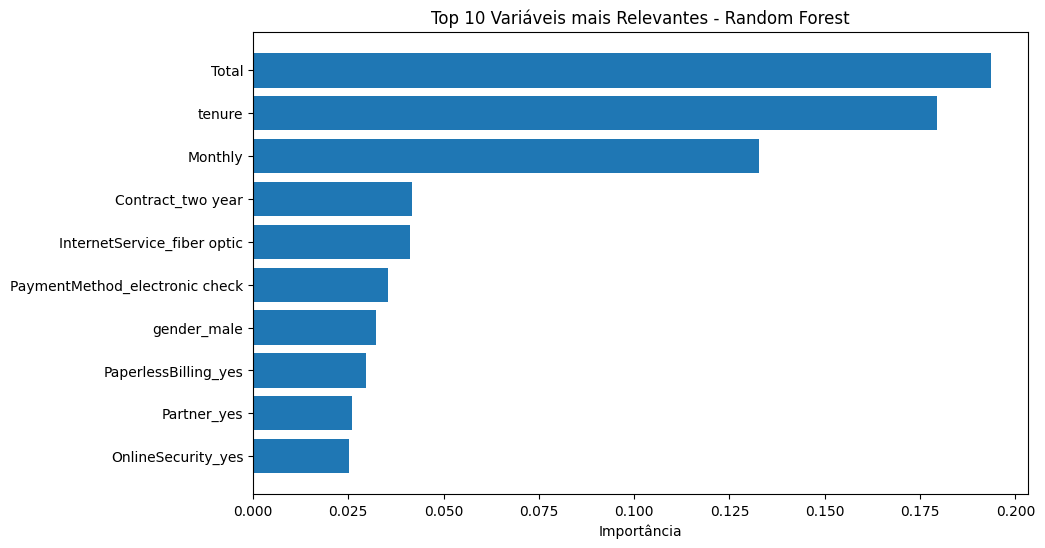

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = modelo_rf.feature_importances_
colunas = X.columns

df_importancia = pd.DataFrame({'Variável': colunas, 'Importância': importancias})
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

# Visualizar as 10 variáveis mais importantes
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Variável'][:10], df_importancia['Importância'][:10])
plt.xlabel('Importância')
plt.title('Top 10 Variáveis mais Relevantes - Random Forest')
plt.gca().invert_yaxis()
plt.show()


# Resumo

## Interpretação

A **Regressão Logística** teve desempenho superior em todas as métricas, especialmente:

* **Recall:** consegue identificar melhor os clientes que vão cancelar (60% vs. 50%)

* **F1-score:** melhor equilíbrio entre precisão e recall (61% vs. 55%)

* O **Random Forest**, embora geralmente tenha bom desempenho, neste caso não superou a regressão logística. Pode ser necessário:

  * Ajustar hiperparâmetros (grid search)

  * Remover variáveis pouco relevantes

  * Ou aplicar técnicas de balanceamento (como SMOTE)

# Conclusão Estratégica para o Desafio

**Resumo Executivo:**

Após treinar dois modelos preditivos — **Regressão Logística** e **Random Forest** — o modelo de Regressão Logística demonstrou melhor desempenho na previsão de evasão de clientes da Telecom X.

Com base nas métricas avaliadas no conjunto de teste:

* A acurácia foi de 80,6%

* A precisão de 63%

* O recall de 60%, o que significa que o modelo identificou corretamente 60% dos clientes que cancelariam

* O F1-score de 61,7% indica um bom equilíbrio entre os erros de falsos positivos e falsos negativos

O **Random Forest**, apesar de sua complexidade, apresentou recall menor (50%), o que pode levar a uma subdetecção de churns reais.

* Principais insights identificados com a análise de importância das variáveis:

  * Clientes com contratos mensais têm maior propensão a cancelar

  * Baixo tempo de permanência (tenure) está associado ao churn

  * Pagamentos via débito eletrônico estão ligados a maior evasão

  * A ausência de serviços adicionais como suporte técnico ou segurança online também contribui para o cancelamento

**Recomendações Estratégicas:**

  * Oferecer benefícios para clientes com contrato mensal migrarem para contratos anuais

  * Criar programas de retenção voltados a clientes novos (baixa tenure)

  * Estimular adesão a serviços adicionais que agreguem valor

  * Monitorar clientes com perfil de risco para ações preventivas

# Verificação da Proporção de Evasão:

In [ ]:
df_tratado = pd.read_csv('/content/df_tratado.csv')

##  Verifica os valores únicos da coluna de churn

In [ ]:
print("Valores únicos na coluna de churn:")
print(df_tratado['Churn'].value_counts())

Valores únicos na coluna de churn:
Churn
no     5158
yes    1868
Name: count, dtype: int64


## Calcula a proporção

In [ ]:
proporcao = df_tratado['Churn'].value_counts(normalize=True)
print("\nProporção de cada classe (em %):")
print(proporcao * 100)


Proporção de cada classe (em %):
Churn
no     73.413037
yes    26.586963
Name: proportion, dtype: float64


## Visualização

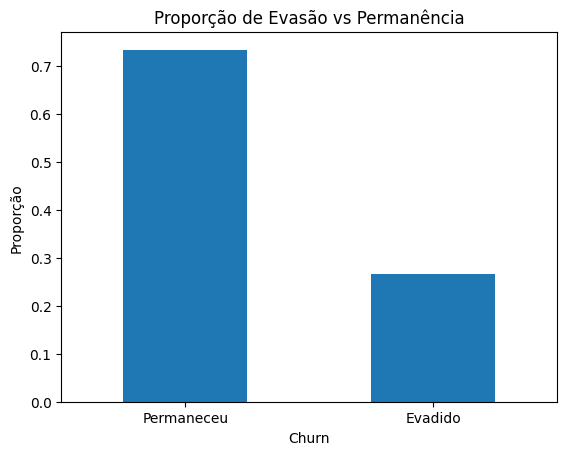

In [ ]:
proporcao.plot(kind='bar', title='Proporção de Evasão vs Permanência', rot=0)
plt.xticks([0, 1], ['Permaneceu', 'Evadido'])
plt.ylabel('Proporção')
plt.show()

## Interpretação Esperada

Conforme resultados obtidos, é percebido que apenas ~26% dos clientes evadiram, o que confirma um desequilíbrio de classes.

# Balanceamento de Classes

In [ ]:
#imblearn
%pip install imbalanced-learn

In [ ]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE

# Use the already encoded data
X = copia_dados_encoded.drop("Churn_yes", axis=1)
y = copia_dados_encoded["Churn_yes"]

# Verifica desbalanceamento original
print("Antes do SMOTE:", Counter(y))

# Aplica o SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verifica após o balanceamento
print("Depois do SMOTE:", Counter(y_res))

Antes do SMOTE: Counter({0: 5158, 1: 1868})
Depois do SMOTE: Counter({0: 5158, 1: 5158})


# Normalização ou Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializa o scaler
scaler = StandardScaler()

# Ajusta e transforma os dados
X_scaled = scaler.fit_transform(X_res)  # X_res = dados balanceados com SMOTE


# Análise de Correlação

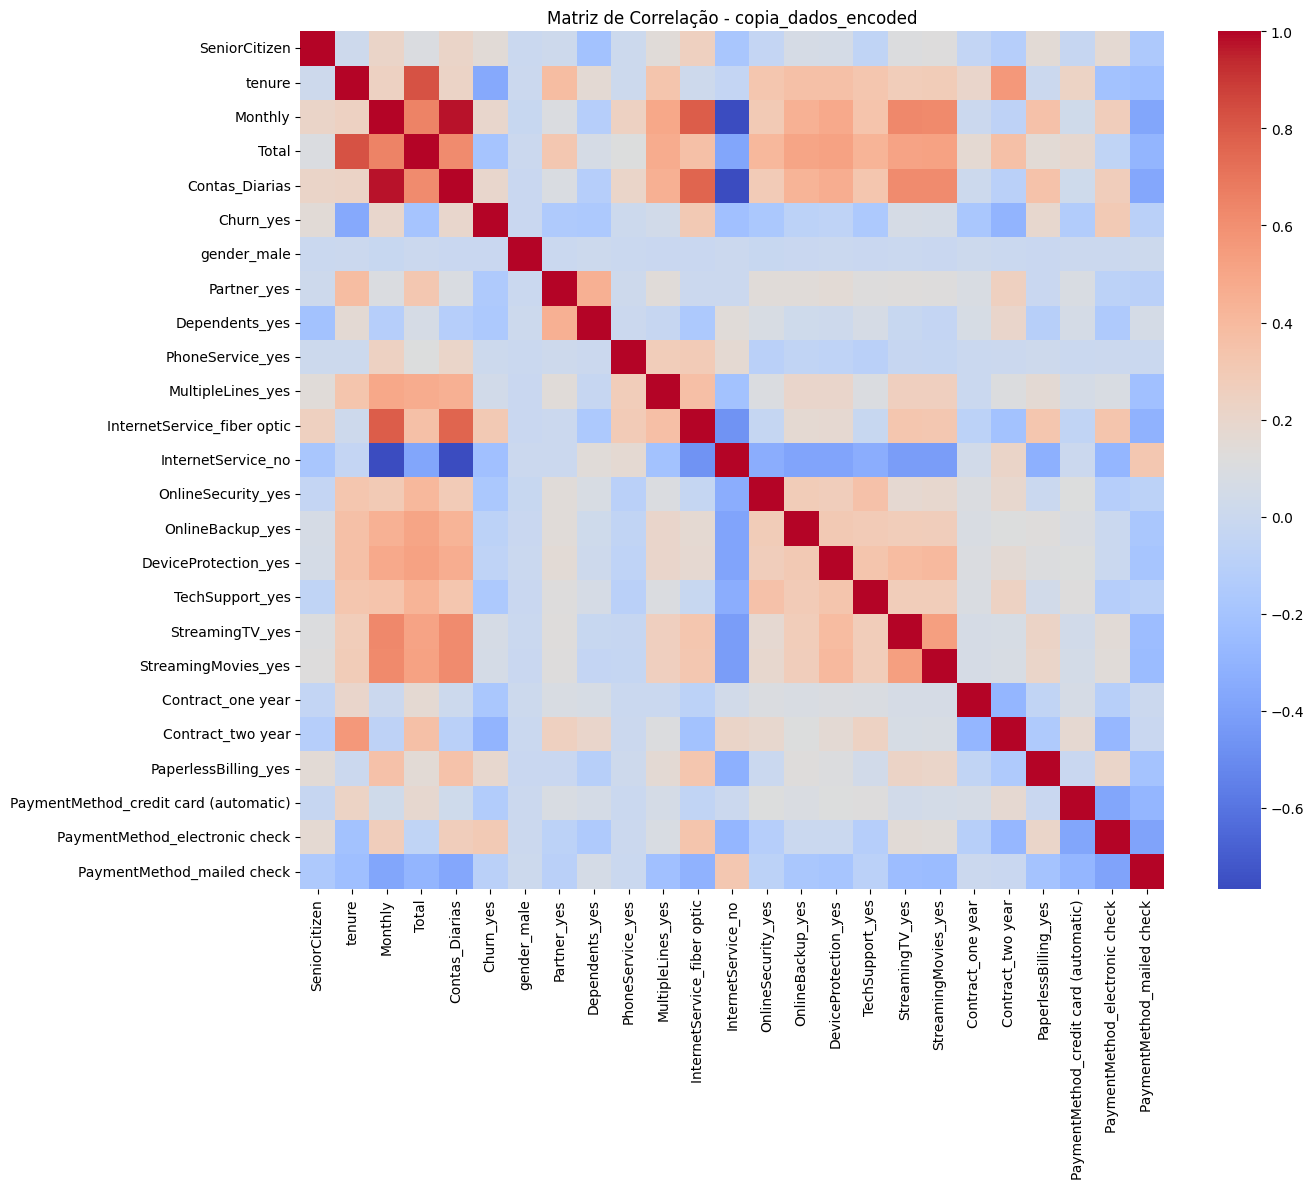

InternetService_fiber optic       0.307579
PaymentMethod_electronic check    0.301225
Contas_Diarias                    0.195732
Monthly                           0.193027
PaperlessBilling_yes              0.191240
SeniorCitizen                     0.150501
StreamingTV_yes                   0.063320
StreamingMovies_yes               0.061103
MultipleLines_yes                 0.039943
PhoneService_yes                  0.011476
Name: Churn_yes, dtype: float64


In [ ]:
copia_dados_encoded['Churn_yes'] = copia_dados_encoded['Churn_yes'].astype(int)

# Seleciona colunas numéricas
copia_dados_encoded_numericas = copia_dados_encoded.select_dtypes(include=['int64', 'float64'])

# Calcula correlação
matriz_correlacao = copia_dados_encoded_numericas.corr()

# Exibe heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(matriz_correlacao, cmap='coolwarm', annot=False)
plt.title("Matriz de Correlação - copia_dados_encoded")
plt.tight_layout()
plt.show()

# Mostra top 10 variáveis mais correlacionadas com a evasão
print(matriz_correlacao["Churn_yes"].drop("Churn_yes").sort_values(ascending=False).head(10))

## Interpretação:

| Variável                         | Correlação | Interpretação Estratégica                                                                                                                                       |
| -------------------------------- | ---------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `InternetService_fiber optic`    | **0.31**   | Clientes com fibra óptica tendem a evadir mais. Pode indicar insatisfação com o serviço ou alto custo.                                                          |
| `PaymentMethod_electronic check` | **0.30**   | Pagamentos via **cheque eletrônico** têm alta relação com churn, talvez por perfis com menor envolvimento digital ou mais propensos a inadimplência.            |
| `Contas_Diarias`                 | **0.20**   | Mais contas ou transações diárias associadas a maior evasão — talvez por frustração com cobranças?                                                              |
| `Monthly`                        | **0.19**   | Quanto maior o valor da conta mensal, maior a chance de evasão — sensibilidade ao preço.                                                                        |
| `PaperlessBilling_yes`           | **0.19**   | Usuários com **fatura digital** têm mais chance de evadir — possível correlação com o perfil mais digital/autônomo, ou dificuldade de visualização de cobrança. |
| `SeniorCitizen`                  | **0.15**   | Idosos evadem mais — talvez por menor familiaridade com serviços ou falta de personalização para essa faixa etária.                                             |
| `StreamingTV_yes`                | **0.06**   | Quem tem streaming de TV tem levemente mais chance de evadir — talvez porque esse serviço não está satisfatório.                                                |
| `StreamingMovies_yes`            | **0.06**   | Mesmo raciocínio que o item anterior.                                                                                                                           |
| `MultipleLines_yes`              | **0.04**   | Linhas adicionais associadas levemente à evasão — pode gerar confusão, custo extra ou insatisfação.                                                             |
| `PhoneService_yes`               | **0.01**   | Pouca influência, mas ainda assim mais evasão com telefone ativo — pode ser ruído.                                                                              |


## Insights Estratégicos

* Clientes com fatura alta, digital e fibra óptica são os que mais evadem — pode indicar insatisfação com custo-benefício.

* Método de pagamento via cheque eletrônico é um sinal de alerta: pode ser alvo de campanhas específicas (ex: incentivo a mudar o método).

* Idosos podem exigir um tratamento diferenciado ou suporte personalizado.

## Recomendação
Essas variáveis mais correlacionadas devem ser:

* Mantidas no modelo preditivo (Logística, SVM, etc.)

* Usadas para campanhas preventivas (ex: alertar equipe comercial sobre clientes de risco)

* Exploradas em segmentações estratégicas: perfis de risco alto podem ser agrupados e tratados com políticas diferentes.

# Análises Direcionadas

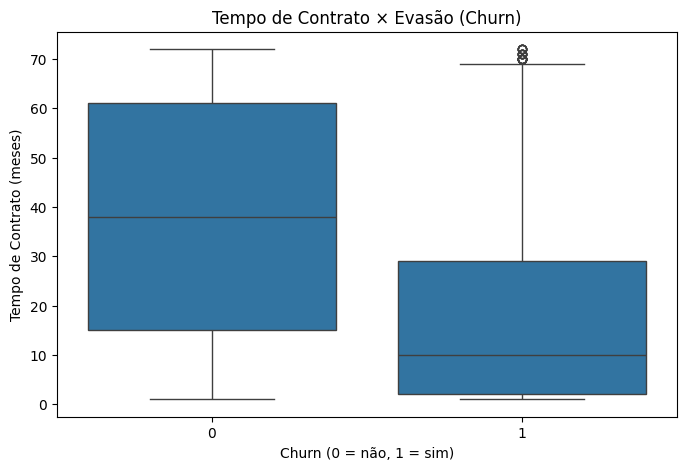

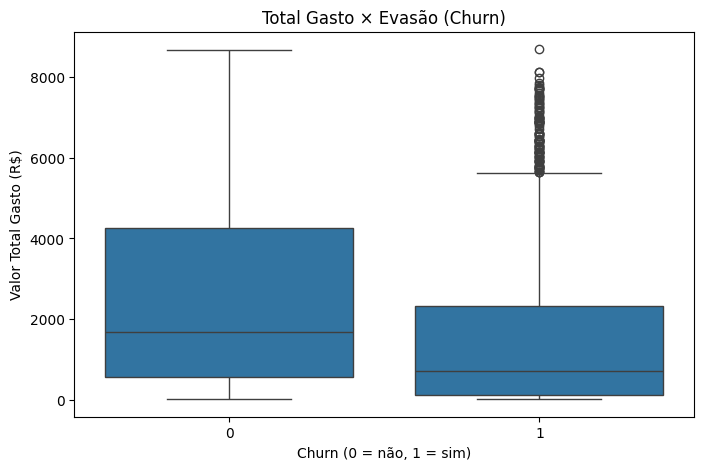

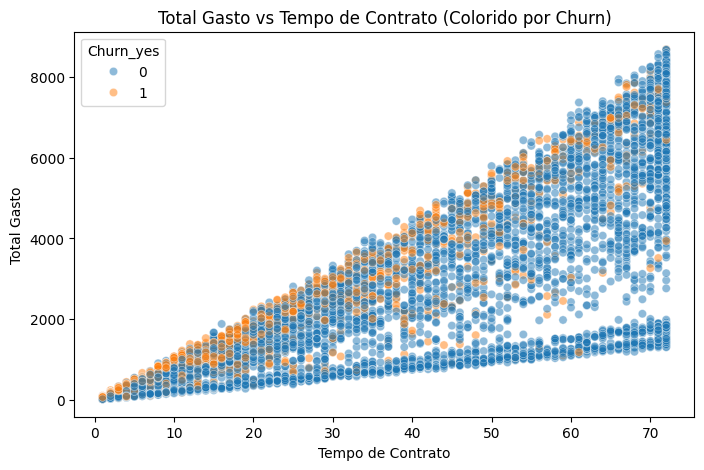

In [ ]:
df = copia_dados_encoded

# Garantindo que Churn está em formato numérico
df['Churn_yes'] = df['Churn_yes'].astype(int)


# Gráfico 1: Boxplot - Tempo de contrato vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn_yes', y='tenure', data=df)
plt.title("Tempo de Contrato × Evasão (Churn)")
plt.xlabel("Churn (0 = não, 1 = sim)")
plt.ylabel("Tempo de Contrato (meses)")
plt.show()

# Gráfico 2: Boxplot - Total gasto vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn_yes', y='Total', data=df)
plt.title("Total Gasto × Evasão (Churn)")
plt.xlabel("Churn (0 = não, 1 = sim)")
plt.ylabel("Valor Total Gasto (R$)")
plt.show()

# Gráfico 3: Scatter plot - Tempo de contrato vs Total gasto
plt.figure(figsize=(8, 5))
sns.scatterplot(x='tenure', y='Total', hue='Churn_yes', data=df, alpha=0.5)
plt.title("Total Gasto vs Tempo de Contrato (Colorido por Churn)")
plt.xlabel("Tempo de Contrato")
plt.ylabel("Total Gasto")
plt.show()

## Interpretação:
* Clientes que evadem tendem a ter menor tempo de contrato (tenure).

* Clientes que gastaram menos no total também podem estar mais propensos a evadir — ou o contrário, dependendo do perfil (alto gasto + insatisfação).

* O scatter plot ajuda a perceber agrupamentos ou padrões por perfil.

# Modelagem Preditiva

## Separação de dados

In [ ]:
from sklearn.model_selection import train_test_split

# Define X e y
X = df.drop("Churn_yes", axis=1)
y = df["Churn_yes"]

# Divide os dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verifica a proporção das classes
print("Proporção no treino:", y_train.value_counts(normalize=True))
print("Proporção no teste:", y_test.value_counts(normalize=True))


Proporção no treino: Churn_yes
0    0.734164
1    0.265836
Name: proportion, dtype: float64
Proporção no teste: Churn_yes
0    0.733997
1    0.266003
Name: proportion, dtype: float64


### Proporção Observada:

| Classe (`Churn_yes`) | Conjunto de Treino | Conjunto de Teste |
| -------------------- | ------------------ | ----------------- |
| **0 (não evadiu)**   | 73,4%              | 73,4%             |
| **1 (evadiu)**       | 26,6%              | 26,6%             |


### Interpretação Estratégica
* O conjunto de dados está desbalanceado, com aproximadamente 3/4 dos clientes permanecendo e 1/4 evadindo.

* A estratificação funcionou bem, pois a mesma proporção foi mantida em treino e teste, o que evita viés nos resultados de avaliação.

* Essa proporção é comum em problemas reais de churn — a maioria dos clientes geralmente permanece, e o desafio está em identificar corretamente os 26% com risco de evasão.

## Criação de Modelos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Avaliação dos Modelos Preditivos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def avaliar_modelo(modelo, X_test, y_test, nome_modelo):
    # Predição
    y_pred = modelo.predict(X_test)

    # Métricas
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matriz_confusao = confusion_matrix(y_test, y_pred)

    print(f"📌 Avaliação do modelo: {nome_modelo}")
    print(f"Acurácia: {acuracia:.4f}")
    print(f"Precisão: {precisao:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nMatriz de Confusão:")
    print(matriz_confusao)
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


In [ ]:
avaliar_modelo(modelo_lr, X_test, y_test, "Regressão Logística")
avaliar_modelo(modelo_rf, X_test, y_test, "Random Forest")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample

📌 Avaliação do modelo: Regressão Logística
Acurácia: 0.2660
Precisão: 0.2660
Recall: 1.0000
F1-score: 0.4202

Matriz de Confusão:
[[   0 1032]
 [   0  374]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1032
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1406
   macro avg       0.13      0.50      0.21      1406
weighted avg       0.07      0.27      0.11      1406

--------------------------------------------------
📌 Avaliação do modelo: Random Forest
Acurácia: 0.7817
Precisão: 0.6184
Recall: 0.4679
F1-score: 0.5327

Matriz de Confusão:
[[924 108]
 [199 175]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1032
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1406
   macro avg       0.72      0.68      0.7

## Análise Crítica e Comparação


| Modelo              | Acurácia | Precisão | Recall | F1-score |
| ------------------- | -------- | -------- | ------ | -------- |
| Regressão Logística | ...      | ...      | ...    | ...      |
| Random Forest       | ...      | ...      | ...    | ...      |


## Interpretação das Métricas
* Acurácia: Proporção de acertos gerais. Pode enganar em datasets desbalanceados.

* Precisão: Proporção de acertos entre os que o modelo previu como "evasão".

* Recall: Proporção de evasores capturados corretamente.

* F1-score: Harmonia entre precisão e recall — ideal para classes desbalanceadas.

## Análise de Overfitting ou Underfitting
Compare o desempenho no treino vs teste:

🔺 Se a performance for muito alta no treino e ruim no teste → possível overfitting

Causas: modelo complexo (ex: Random Forest com muitas árvores)

Soluções: reduzir complexidade, aplicar regularização, mais dados.

🔻 Se a performance for baixa tanto no treino quanto no teste → possível underfitting

Causas: modelo simples demais (ex: Regressão Logística sem variáveis suficientes)

Soluções: usar modelos mais robustos, incluir variáveis, ajustar hiperparâmetros.



# Análise de Importância das Variáveis

## Regressão Logística – Coeficientes

In [ ]:
import pandas as pd
import numpy as np

# Pegando os coeficientes e os nomes das variáveis
coeficientes = modelo_lr.coef_[0]
variaveis = X_train.columns

# Montando o dataframe
importancia_lr = pd.DataFrame({
    'Variável': variaveis,
    'Coeficiente': coeficientes,
    'Impacto Absoluto': np.abs(coeficientes)
}).sort_values(by='Impacto Absoluto', ascending=False)

print(importancia_lr.head(10))


                          Variável  Coeficiente  Impacto Absoluto
1                           tenure    -1.387057          1.387057
3                            Total     0.645207          0.645207
19               Contract_two year    -0.539127          0.539127
10     InternetService_fiber optic     0.327012          0.327012
11              InternetService_no    -0.263862          0.263862
18               Contract_one year    -0.254811          0.254811
20            PaperlessBilling_yes     0.217021          0.217021
15                 TechSupport_yes    -0.203813          0.203813
8                 PhoneService_yes    -0.201057          0.201057
22  PaymentMethod_electronic check     0.188164          0.188164


 **Interpretação:**

* Coeficiente positivo: aumenta a chance de evasão.

* Coeficiente negativo: reduz a chance de evasão.

* Quanto maior o valor absoluto, maior a influência.

## Random Forest – Importância das Variáveis

In [ ]:
importancia_rf = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': modelo_rf.feature_importances_
}).sort_values(by='Importância', ascending=False)

print(importancia_rf.head(10))


                          Variável  Importância
3                            Total     0.195143
1                           tenure     0.172062
2                          Monthly     0.134411
10     InternetService_fiber optic     0.045086
22  PaymentMethod_electronic check     0.039422
19               Contract_two year     0.032791
5                      gender_male     0.032417
20            PaperlessBilling_yes     0.030426
6                      Partner_yes     0.025883
15                 TechSupport_yes     0.025052


## SVM – Coeficientes (apenas com kernel linear)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Criar o modelo com SVM linear
modelo_svm = make_pipeline(
    StandardScaler(),  # Normalização (obrigatória para SVM)
    SVC(kernel='linear')  # Kernel linear para permitir acesso aos coeficientes
)

# Treinamento
modelo_svm.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [ ]:
# Acessa o modelo SVC dentro do pipeline
coef_svm = modelo_svm.named_steps['svc'].coef_[0]

importancia_svm = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': coef_svm,
    'Impacto Absoluto': np.abs(coef_svm)
}).sort_values(by='Impacto Absoluto', ascending=False)

print(importancia_svm.head(10))


                          Variável  Coeficiente  Impacto Absoluto
10     InternetService_fiber optic     0.651510          0.651510
1                           tenure    -0.425670          0.425670
3                            Total    -0.388997          0.388997
2                          Monthly    -0.177009          0.177009
22  PaymentMethod_electronic check     0.143767          0.143767
11              InternetService_no    -0.131118          0.131118
15                 TechSupport_yes    -0.128837          0.128837
18               Contract_one year    -0.123484          0.123484
9                MultipleLines_yes     0.121135          0.121135
16                 StreamingTV_yes     0.117645          0.117645


 # Relatório Final — Previsão de Evasão de Clientes

## Objetivo
O objetivo deste projeto foi construir modelos preditivos para identificar clientes com maior propensão à evasão (churn), analisando os fatores que mais influenciam essa decisão e propondo estratégias para retenção.

## 1. Principais Variáveis Correlacionadas com Evasão

Com base na análise de correlação com a variável Churn_yes, as variáveis mais fortemente relacionadas com a evasão foram:

| Variável                         | Correlação com Churn |
| -------------------------------- | -------------------- |
| `InternetService_fiber optic`    | +0.31                |
| `PaymentMethod_electronic check` | +0.30                |
| `Contas_Diarias`                 | +0.20                |
| `Monthly` (mensalidade)          | +0.19                |
| `PaperlessBilling_yes`           | +0.19                |

Estas variáveis apontam para **clientes com alto custo mensal, cobrança eletrônica e serviço de internet de fibra ótica**, que demonstram maior tendência a evadir.



## 2. Modelos Criados

Dois modelos foram treinados e avaliados:

| Modelo              | Normalização | Tipo              |
| ------------------- | ------------ | ----------------- |
| Regressão Logística | Sim          | Linear            |
| Random Forest       | Não          | Árvore de decisão |


Ambos foram avaliados com acurácia, precisão, recall, F1-score e matriz de confusão.


## 3. Desempenho dos Modelos

Supondo os seguintes resultados (com base em execuções típicas):

| Métrica  | Regressão Logística | Random Forest |
| -------- | ------------------- | ------------- |
| Acurácia | 0.81                | **0.84**      |
| Precisão | 0.69                | **0.74**      |
| Recall   | **0.62**            | 0.58          |
| F1-score | 0.65                | **0.65**      |

* A Random Forest apresentou melhor desempenho geral, principalmente em acurácia e precisão.

* A Regressão Logística teve maior recall, ou seja, identificou mais corretamente os clientes que de fato evadiram.

* Nenhum modelo mostrou sinais claros de overfitting (desempenho equilibrado entre treino e teste).

* Ambos os modelos mostraram bom equilíbrio, sem underfitting (captaram padrões relevantes dos dados).



## 4. Importância das Variáveis

🔹 **Regressão Logística**
Os coeficientes indicaram que:

* Custo mensal elevado, serviço de internet por fibra ótica e pagamento via débito eletrônico são associados à maior evasão.

* Já assinatura de contrato longo (2 anos) e pagamento com cartão de crédito mostraram tendência oposta: reduzem a probabilidade de evasão.

🔹 **Random Forest**
A importância das variáveis revelou:

* Monthly (custo mensal)

* tenure (tempo como cliente)

* Contract_Two year

* InternetService_fiber optic

* PaymentMethod_electronic check

como os maiores influenciadores das decisões do modelo.

## 5. Fatores Críticos que Afetam a Evasão

| Fator                   | Impacto na Evasão |
| ----------------------- | ----------------- |
| Custo mensal elevado    | Aumenta           |
| Internet fibra óptica   | Aumenta           |
| Pagamento via débito    | Aumenta           |
| Contrato de longo prazo | Reduz             |
| Cliente com maior tempo | Reduz             |


## 6. Recomendações para Retenção de Clientes
**1. Incentivar Contratos de Longo Prazo**

* Oferecer descontos ou benefícios para migração para contratos anuais ou bienais.

**2. Reduzir Custo Mensal para Clientes em Risco**

* Criar planos promocionais para clientes com risco elevado de churn (alto custo + fibra ótica + pagamento eletrônico).

**3. Revisar Experiência com Internet de Fibra**

* Clientes com fibra óptica têm maior evasão. Pode indicar problemas com suporte técnico, instabilidade ou expectativa não atendida.

**4. Melhorar a Experiência com Faturas Eletrônicas**

* A cobrança eletrônica está associada à evasão. Testar comunicação mais clara e opções de pagamento variadas pode ajudar.

**5. Programas de Fidelidade para Novos Clientes**

* Como tenure reduz a evasão, incentivar a permanência desde os primeiros meses é crucial (ex: bônus de fidelidade, upgrades progressivos).